# COGS 118A - Project Checkpoint

# Names

- Irisa Jin
- Mizuho Fukuda
- Varsha Sampath
- Maya Que

# Abstract 

Our goal is to build a recommender system based on Amazon reviews of women’s clothing. That is, to predict recommended products for a customer based on their shopping experience with Amazon dresses. We will collect our dataset from Amazon reviews to represent the customers’ shopping experience and preferences for clothing items. We will conduct natural language processing using the NLTK library on this dataset to analyze the contents of the reviews and extract the customers’ sentiments about the product. We will also be using multi-class classification with logistic regression to classify categories of women’s clothing based on various features in the reviews dataset. Due to the multitude of departments of womens' clothing on Amazon, we intend to focus on the top six most reviewed clothing types, and the One vs. Rest approach will be employed to predict specific categories based on the trends observed in customer reviews. The performance of our model will be evaluated through a confusion matrix to generate true and false predictions as well as through ROC curve and AUC, which will give us an overall picture of our classification success. This can be used to further modify the model if needed.

# Background

In a society where online shopping and ecommerce have become a new norm, especially after a global pandemic, creating the best experience for online shoppers has become increasingly important. According to an article by Forbes <a name="doty"><a>[<sup>[1]<sup>](#dotynote), consumers heavily prefer personalized advertisements that are tailored to their interests, and that “90% of consumers say that messages from companies that are not personally relevant to them are ‘annoying.’” This demonstrates not only the usefulness of personalized marketing but also the importance of accurate recommendation systems that do not erroneously recommend irrelevant products to consumers. It also makes ads more engaging and more likely to be interacted with, creating an overall improved experience for consumers. Many big tech companies make enormous profits by gathering and selling data based on users’ interests and shopping habits. By improving and effectively integrating a recommendation system into the online shopping process, Amazon has “reported a 29% sales increase to $12.83 billion during its second fiscal quarter,” illustrating how the improved shopping experience for customers directly translates to improved profits for an online seller. What kind of data are these online businesses and marketers using and how are they using it to create the most profitable targeted advertisements and recommendations to their shoppers?

Given the obvious advantages of generating effective product recommendations, the importance of answering this question is clear, and much research has gone into the most successful and common ways to do this. According to this literature review of studies of recommendation systems <a name="portugal"><a>[<sup>[2]<sup>](#portugalnote), a few of the most common machine learning algorithms studied to accomplish this task are clustering, decision trees, and regression. Additionally, the study details the importance of how a larger data set can improve the success of the system’s recommendations. These findings motivate how we identified the problem, as well as our proposed dataset and recommendation algorithm.

E-commerce companies like Amazon use recommender systems to identify similar or complementary products that the user just bought or viewed to maximize the impulse buying phenomenon that occurs in their physical counterparts. The personalization of shopping online keeps customers engaged and offers products of interest to them that they may not even think about. There are three main types of recommendation systems: Collaborative filtering, Content-Based filtering, and Hybrid Recommendation systems<a name="maruti"><a>[<sup>[3]<sup>](#marutinote). Collaborative filtering uses past user behavior to make recommendations while content-based filtering focuses on the attributes of the product content itself to make recommendations. Hybrid recommendation systems is a combination of using both types of filtering simultaneously to suggest a broader range of products for customers<a name="maruti"><a>[<sup>[3]<sup>](#marutinote). As these recommendation systems not only help enhance user experience, but also increase sales, efficiency, and cost savings, it is important to build understanding about how recommender algorithms work to cluster products together and suggest them to a user based on their metadata to make further improvements at integration accurate recommendations into every step of the purchasing process. We hope to make use of customers' reviews to predict the types of products they like. 


# Problem Statement

While E-commerce has made shopping more accessible over the past decades, people have also noticed that many issues are arising with the limitation of the in-person experience. This is especially notable when shopping for women’s clothing. Shopping on online platforms such as Amazon for women’s clothing has always been a widely-studied topic because it is difficult to make recommendations with many different categories of clothing and range of users. Therefore, for this project, our team has decided to look into this problem by making clothing category predictions for users on Amazon. We will analyze users' reviews to determine which product catagory they like most and should be recommended to them. We will be implementing a logistic regression algorithm that predicts classes based on the One vs. Rest approach; in other words, 1 will be predicted if the category that the machine learning algorithm predicts matches one specific category that we choose and 0 if not (any other class). This will be computed for the different classes we choose to look at. For this algorithm, we will measure its overall performance by building a confusion matrix on the results from using the testing dataset. The confusion matrix will allow us to calculate various metrics that will be useful for assessing the model (see more on Evaluation Metrics). In addition to having the steps be clearly listed, we will be making sure that the results can be replicated by performing cross-validation on the dataset before starting each run.

# Data

UPDATED FROM PROPOSAL!

You should have obtained and cleaned (if necessary) data you will use for this project.

Please give the following infomration for each dataset you are using
- link/reference to obtain it
- description of the size of the dataset (# of variables, # of observations)
- what an observation consists of
- what some critical variables are, how they are represented
- any special handling, transformations, cleaning, etc you have done should be demonstrated here!

For this project, we found a dataset that contains Amazon reviews on womens' clothing. Here is some general information regarding the dataset:

- 11 variables, 23486 observations
- Each observation consists of the index (unique), age of the customer, division of the cloth the customer bought, department of the cloth, classification of the cloth, clothing ID (unique), title of the review text, the content of the review text, number of other customers who agree with the review, ratings in stars given to the product, and a binary recommendation index with 1 as YES and 0 as NO
- Source: https://www.kaggle.com/datasets/surajjha101/myntra-reviews-on-women-dresses-comprehensive

Notice that the final size of the dataset that will be used is different since there are missing values and points that we manually omit for the purpose of the project. The critical varibles that we will focus on is the age, class of clothing, review text, number of customers who agree with the given feedback, and the rating. The rest of the variables, including the division of clothing, department of clothing, clothing id, and title of review will not be used in our mdel since they are quite similar to other features and thus, redundant. Furthermore, our project intends to recommend similar clothing to customers who had a positive experience, so we are only concerned with reviews that have a recommend index of 1. 

We intend to numerically encoded text-form data to transform the data into an analyzable form. To do this, we will use the NLTK package to manipulate the text data, count the most frequently used words, clean out English stopwords, and stemm words with NLTK to avoid repetition of the same meaning of words.

In [1]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nltk.corpus import stopwords # if it can't load, run: pip install nltk -> nltk.download('stopwords')
from collections import defaultdict

In [2]:
#import nltk
#nltk.download('stopwords')

**Raw Data**

In [20]:
data = pd.read_csv('dresses.csv')
data.head()

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
2,2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0
3,3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1
4,4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1


In [21]:
df.shape

(18527, 5)

**Data Cleaning**

The columns: s.no, division_name, department_name, clothing_id, and title will not be used in our analysis because they are either irrelevant information or they overlap with other features.

In addition, since we only want to look at positive reviews, we will only be using reviews with a recommendation index of 1.

In [22]:
# Dropping redundant columns
df = data.drop(columns=['s.no','division_name','department_name','clothing_id','title'])
df = df[df['recommend_index '] != 0]
df = df.drop(columns=['recommend_index '])
df.head()

,age,class_name,review_text,alike_feedback_count,rating
0,40,Jeans,Like other reviewers i was hesitant to spend t...,0,5
1,62,Blouses,As is true of a bunch of the fall clothing pho...,12,5
3,45,Pants,Love love this! i was hesitant to buy this at ...,0,5
4,37,Swim,I absolutely love the retro look of this swims...,0,5
5,43,Sweaters,I love this sweater but i'm on the fence about...,0,4


We looked at if there are any values missing from the dataframe, after dropping unneeded columns. We found 14 missing values in class_name and 774 missing values in review_text. This is a small amount of data considering the large size of our dataset, therefore, dropping these points would not greatly affect our predictions.

In [23]:
# Checking if there is missing/Nan values
df.isnull().values.any() 
df.isnull().sum() 

# Dropping NaN values
df = df.dropna()
df

,age,class_name,review_text,alike_feedback_count,rating
0,40,Jeans,Like other reviewers i was hesitant to spend t...,0,5
1,62,Blouses,As is true of a bunch of the fall clothing pho...,12,5
3,45,Pants,Love love this! i was hesitant to buy this at ...,0,5
4,37,Swim,I absolutely love the retro look of this swims...,0,5
5,43,Sweaters,I love this sweater but i'm on the fence about...,0,4
...,...,...,...,...,...
23481,44,Dresses,I oot this dress in the blue. it fits great--h...,0,5
23482,39,Dresses,I was very patient with this dress. i was wait...,1,5
23483,29,Knits,"The deep v doesn't gape, and flatters the neck...",0,5
23484,57,Dresses,"I saw this dress online this morning, went int...",10,5


**EDA**

Here we look at the distribution of the ages:

There seem to be a few high outliers. It seems unlikely that an Amazon reviewer is 99 years old but we will keep these datapoints because it should not affect our results greatly.

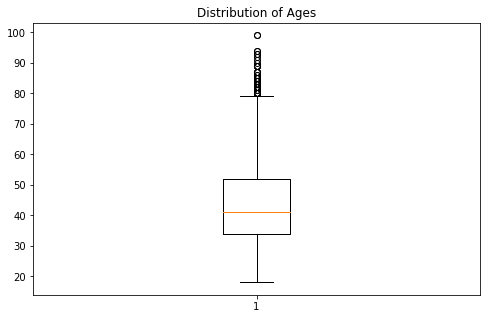

In [24]:
plt.figure(figsize=(8, 5))
plt.boxplot(df['age'])
plt.title('Distribution of Ages')
plt.show()

Now we look at the distribution of the different classes of clothing:

As shown below, some classes have significantly more reviews than others. Since we will be doing multi-class classification, it would simplify our analysis and computation if we reduce the number of categories. As a result, we decided to only focus on the top 6 most popular clothing categories: Dresses, knits, blouses, pants, sweaters, and jeans. Dropping the other categories from our dataset still leaves us with 14307 data points, which is still large enough.

In [9]:
df['class_name'].value_counts()

Dresses           4948
Knits             3758
Blouses           2406
Pants             1124
Sweaters          1100
Jeans              971
Fine gauge         882
Skirts             760
Jackets            576
Lounge             574
Swim               264
Outerwear          259
Shorts             255
Sleep              183
Legwear            135
Intimates          126
Layering           116
Trend               88
Casual bottoms       1
Chemises             1
Name: class_name, dtype: int64

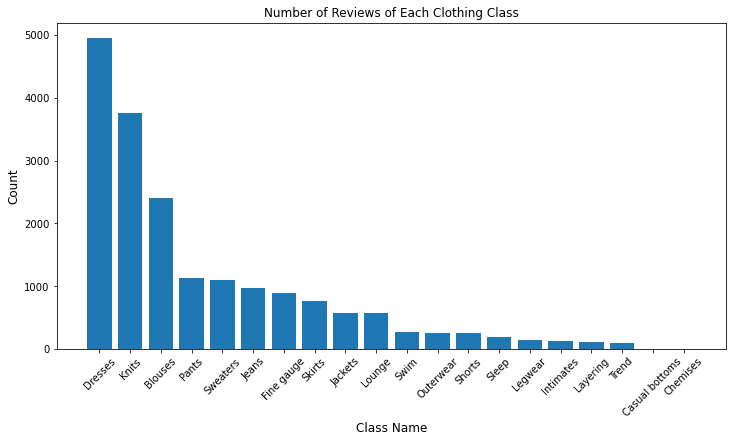

In [10]:
df_class_group = df.groupby('class_name').count().reset_index().sort_values('age', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(data=df_class_group, x='class_name', height='age')
plt.xticks(rotation=45)
plt.title('Number of Reviews of Each Clothing Class')
plt.xlabel('Class Name', fontsize='large')
plt.ylabel('Count', fontsize='large')
plt.show()

In [11]:
top_class_names = list(df['class_name'].value_counts()[:6].index)
df = df[df['class_name'].isin(top_class_names)]
df.head()

,age,class_name,review_text,alike_feedback_count,rating
0,40,Jeans,Like other reviewers i was hesitant to spend t...,0,5
1,62,Blouses,As is true of a bunch of the fall clothing pho...,12,5
3,45,Pants,Love love this! i was hesitant to buy this at ...,0,5
5,43,Sweaters,I love this sweater but i'm on the fence about...,0,4
6,83,Sweaters,Love this sweater!\r\nsoft and cozy and the ru...,4,5


# Proposed Solution

We will perform multi-class classification with logistic regression to classify categories of women’s dresses based on various features of the review dataset. Since there are multiple categories and departments of dresses and we wish to predict specific categories based on trends in customer reviews, it is appropriate to classify reviews into multiple classes rather than only 2 sets. The One vs. Rest approach will be utilized to perform multi-class classification. The reason for choosing One vs. Rest rather than the One vs. One approach is out of the concern that the One vs. One approach may be too computationally exhausting for our purposes due to the large number of categories we plan to classify. The number of classifiers required for the One vs. Rest approach is k (equal to the number of categories) whereas the One vs. One approach requires k(k-1)/2 classifiers to classify k categories. Since we expect to categorize the 23.5k reviews (likely less after we drop some of the less popular categories) into at least 5 different categories, it is more appropriate to use a One vs. Rest approach. As such, we chose logistic regression as the method of classification since logistic regression allows us to quantify confidence scores for the classification, which is used as a tiebreaker in the One vs. Rest approach of multi-class classification.

In addition to the main method of classification, we will be using various libraries and algorithms to prepare the data for classification. Specifically, we will be using the NLTK library to analyze the customer reviews. Since the reviews are bodies of text, NLTK provides useful tools for analyzing the contents of these reviews. Methods like nltk.corpus.stopwords.words("english") and nltk.word_tokenize()allows us to transform our data into a form that is easier to work with while providing useful information about our dataset. NLTK also provides a built-in sentiment analyzer VADER, which is a very useful tool for analyzing the sentiments of the customer reviews. Efficiently and accurately dissecting the contents of the reviews is important for accurate classification. 

# Evaluation Metrics

We plan to use several metrics to evaluate the performance of our algorithm. Confusion matrix will be a useful tool for us to easily visualize and understand the performance of classification. It is a convenient metric since it can be used not only for binary classification but also for multi-class classification. We will be able to generate an easily interpretable k x k grid, displaying true and false predictions. The confusion matrix would show the True Positive (TP), False Positive (FP), True Negative (TN), and False Negative (FN) values. The confusion matrix can tell us information about the accuracy of our model, showing how often it is correct, which is calculated as (TP + TN) / total. It can also tell us about the precision, which shows how often our yes predictions are correct, calculated as TP / yes predictions. Additionally, we can find out about how about our error or misclassification rate by calculating (FP + FN) / total. Furthermore, we will generate a ROC curve and calculate scores such as accuracy, f1 etc. in order to get a better idea of the trends in the performance of the classification in order to better modify the model. The ROC curve is calculated using the True Positive Rate, or sensitivity, against the False Positive Rate, or 1 - sensitivity. The True Positive Rate is equal to TP / (TP + FN), and the False Positive Rate is equal to FP / (FP + TN). These values are plotted against each other to find the ROC curve, from which we can calculate the AUC, or area under the ROC curve. We want this value to be as close to 1.0 as possible to demonstrate an accurate model.

# Preliminary results

NEW SECTION!

Please show any preliminary results you have managed to obtain.

Examples would include:
- Analyzing the suitability of a dataset or alogrithm for prediction/solving your problem 
- Performing feature selection or hand-designing features from the raw data. Describe the features available/created and/or show the code for selection/creation
- Showing the performance of a base model/hyper-parameter setting.  Solve the task with one "default" algorithm and characterize the performance level of that base model.
- Learning curves or validation curves for a particular model
- Tables/graphs showing the performance of different models/hyper-parameters



**Preparing the Dataset for Analysis**

We transform by review text data into numerical values in the next few steps:

In [12]:
#using the stopwords from the nltk package
stopwords_list = stopwords.words('english')

#Find the words with the highest number of occurrences in the dataset
top_words = pd.Series(' '.join(df['review_text']).lower().split()).value_counts()[:200]

#Drop punctuations
for idx in top_words.index:
    for i in list(idx):
        if i in set(string.punctuation):
            top_words = top_words.drop(idx)
            
#Drop stopwords
for idx in top_words.index:
    if idx in stopwords_list:
        top_words = top_words.drop(idx)
        
#Get a series of 50 most frequently occuring words
top_words = top_words[:50]
top_words

dress          5944
love           5816
size           4519
wear           4052
like           3926
fit            3815
great          3447
top            3415
would          2855
little         2637
really         2281
ordered        2260
fabric         2203
bought         2136
color          2086
fits           2006
look           1975
one            1918
perfect        1878
small          1860
bit            1856
looks          1723
nice           1649
got            1647
soft           1442
think          1440
cute           1411
flattering     1376
length         1362
much           1359
beautiful      1347
well           1286
tried          1277
usually        1270
also           1260
petite         1249
shirt          1242
material       1241
comfortable    1211
long           1206
back           1177
get            1170
even           1167
super          1121
true           1118
jeans          1091
still          1084
could          1079
runs           1069
medium         1067


In [13]:
def word_count(text):
    """
    Takes in a body of text and returns a dictionary of word counts.
    """
    counts = defaultdict(int)
    r = ''.join([c for c in text.lower() if not c in set(string.punctuation)])
    
    for w in r.split():
        if w not in stopwords_list:
            counts[w] += 1
    
    return counts

def encode_review(review):
    """
    Takes in a body of text and returns an encoded text based on the occurrece of top words.
    """
    res = np.zeros(len(top_words))
    top = list(top_words.index)
    word_counts = word_count(review)
    i = 0
    for key,value in word_counts.items():
        if key in top:
            res[top.index(key)]=value
        i += 1
        
    return np.array(list(map(int, res)))

In [14]:
#Transform the dataframe by encoding the review_text
df['review_text'] = df['review_text'].apply(encode_review)
df.head()

,age,class_name,review_text,alike_feedback_count,rating
0,40,Jeans,"[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",0,5
1,62,Blouses,"[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",12,5
3,45,Pants,"[0, 2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, ...",0,5
5,43,Sweaters,"[0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, ...",0,4
6,83,Sweaters,"[0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, ...",4,5


**Perform Multi-Class Logistic Regression**

In [15]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression

Reformat data and split into training and test set

In [16]:
#Split X and y and turn Dataframe into numpy arrays
X_pre = df.drop(columns=['class_name']).to_numpy()
y = np.ravel(df[['class_name']].to_numpy())

#Format design matrix
X = np.zeros((X_pre.shape[0], 53))
for i in range(X_pre.shape[0]):
    X[i] = np.hstack(tuple(X_pre[i]))
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Perform logistic regression once:

In [17]:
clf = LogisticRegression(multi_class='ovr', max_iter=1000, solver='liblinear', penalty='l1')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6005124621476823

An accuracy score of 0.6005 is clearly not super high, meaning that our model still requires a lot of work.

**Learning Curve**

Next, we calculate and plot a learning curve to see the ideal training set size:

In [18]:
train_size_abs, train_scores, test_scores = learning_curve(estimator=clf, X=X, y=y)
train_scores = np.array(list(map(np.mean, train_scores)))
test_scores = np.array(list(map(np.mean, test_scores)))
train_scores, test_scores

(array([0.66643357, 0.63366496, 0.61992374, 0.614748  , 0.61324596]),
 array([0.57601152, 0.59628125, 0.60019601, 0.60131421, 0.60005586]))

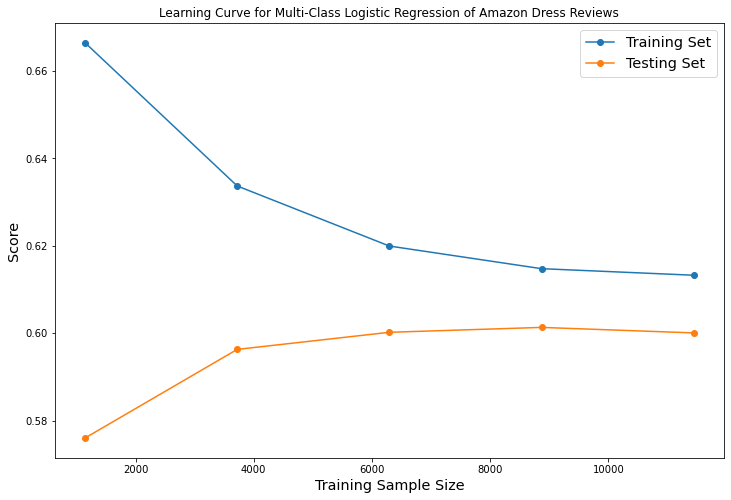

In [19]:
plt.figure(figsize=(12,8))
plt.plot(train_size_abs, train_scores, 'o-')
plt.plot(train_size_abs, test_scores, 'o-')
plt.legend(['Training Set', 'Testing Set'], fontsize='x-large')
plt.title('Learning Curve for Multi-Class Logistic Regression of Amazon Dress Reviews')
plt.xlabel('Training Sample Size', fontsize='x-large')
plt.ylabel('Score', fontsize='x-large')
plt.show()

Based on the learning curve, a larger training sample size around 8000 to 10000 is preferable as the gap between accuracy scores of the training and testing sets is the smallest in this interval.

# Ethics & Privacy

We will be collecting data from Amazon reviews to build a recommender system for the clothing category. Since the data involved are already published online and made freely available on the Amazon website, we do not expect any ethical concerns with collecting our data. However, since there are names associated with Amazon reviews, a certain degree of anonymization will be necessary to ensure that no sensitive identifying information is included in our dataset and that no one’s privacy is placed at risk. The data collected will be stored in a secure database that is only accessible to authorized users. If data is no longer permissible for usage or no longer needed for the project, it will be removed from the database appropriately. It is also crucial for data to be examined objectively and transparently without bias. It should be noted that online shopping reviews are based on the customer’s self-reported experience with that product, so bias is inevitable in our dataset. Since this can affect the recommendations that the customer receives based on their self-reported experience with that product, it is important to make sure that results found from the data are based on reliable statistical techniques and have been collected in an unbiased manner. To account for proxy discrimination, we can make sure to include only user reviews where the customers have purchased the items themselves rather than receiving a free product to help ensure that our model is not relying on external biased variables. This project only aims to analyze the accuracy of recommendations to consumers based on their shopping experience, so we do not expect any unintended harm caused by our results. However, in case of any mishaps, we plan to address the issues by reworking our model and making any required updates to make sure it is producing the most accurate and unbiased results possible.

# Team Expectations 

- Communicate often in group chats. Respond to team members’ messages. Attend all group meetings to the best of your ability.
- Meet the proposed deadlines as best as you can and let others know if you are struggling.
- Divide up work equally. Be respectful of everyone's work.

# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
    |---|---|---|---|
    | 2/20  |  7 PM |  Brainstorm topics/questions  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research |
    | 2/21  |  7 PM |  Do background research on topic | Discuss ideal dataset(s) and ethics; draft project proposal | 
    | 2/22  | 7 PM  | Edit, finalize, and submit proposal; Search for datasets  | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
    | 3/8  | 7 PM  | Import & Wrangle Data ,do some EDA | Review/Edit wrangling/EDA; Discuss Analysis Plan; turn in checkpoint   |
    | 3/17  | 7 PM  | Finalize wrangling/EDA; Begin programming for project | Discuss/edit project code; Complete project |
    | 3/20  | 7 PM  | Complete analysis; Draft results/conclusion/discussion| Discuss/edit full project |
    | 3/22  | Before 11:59 PM  | Finish incomplete code, final touches | Turn in Final Project  |

# Footnotes
<a name="doty"><a>1.[^](#dotynote): Doty, D. (13 Aug 2019) A Reality Check On Advertising Relevancy And Personalization. *Forbes*. https://www.forbes.com/sites/daviddoty/2019/08/13/a-reality-check-on-advertising-relevancy-and-personalization/?sh=f570a477690f<br>

<a name="portugalnote"><a>2.[^](#portugal): Portugal, I., Alencar, P., and Cowan, D. (23 December 2017) The use of machine learning algorithms in recommender systems: A systematic reivew. *Expert Systems with Applications*. https://doi.org/10.1016/j.eswa.2017.12.020<br>

<a name="marutinote"><a>3.[^](#maruti): Maruti Techlabs. (16 Aug 2021) Types of Recommendation Systems & Their Use Cases. *MLearning.ai*. https://medium.com/mlearning-ai/what-are-the-types-of-recommendation-systems-3487cbafa7c9<br>
